In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.utils.data
import torchvision
import kornia

In [3]:
dataset = torchvision.datasets.ImageNet("/workspace/data/datasets/imagenet/", 
                                        split="val", 
                                        transform=torchvision.transforms.Compose(
                                            [
                                                torchvision.transforms.Resize(256), 
                                                torchvision.transforms.CenterCrop(224), 
                                                torchvision.transforms.ToTensor()
                                            ]
                                        )
                                       )

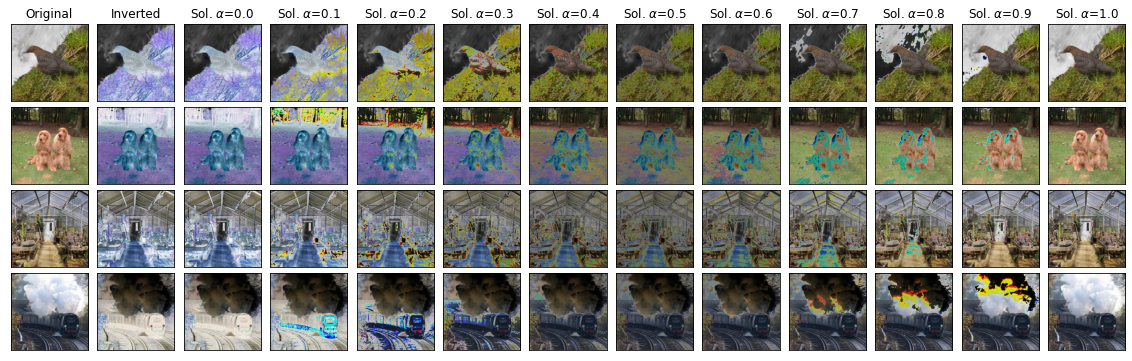

In [4]:
ids = [1003, 11003, 29005, 41003]
alphas = [None, "Invert", *np.arange(0, 1.00001, 0.1)]

fig, axes = plt.subplots(len(ids), len(alphas), figsize=(20, 6))
for ax_col, idx in zip(axes, ids):
    for ax, alpha in zip(ax_col, alphas):
        x, y = dataset[idx][0].unsqueeze(0), torch.tensor([dataset[idx][1]])

        if alpha == None:
            x_aug = x
            if idx == ids[0]:
                ax.set_title("Original")
        elif alpha == "Invert":
            x_aug = 1 - x
            if idx == ids[0]:
                ax.set_title("Inverted")
        else:
            if idx == ids[0]:
                ax.set_title(rf"Sol. $\alpha$={alpha:.1f}")
            x_aug = kornia.enhance.solarize(x, torch.tensor(alpha).float())

        ax.imshow(x_aug.squeeze().permute(1,2,0).detach().cpu().numpy())
        ax.set_xticks([])
        ax.set_yticks([])
        # ax.axis('off')
        for tic in ax.xaxis.get_major_ticks():
            tic.tick1line.set_visible(False)
            tic.tick2line.set_visible(False)

plt.subplots_adjust(wspace=0.1, hspace=0.075)
plt.savefig('output/solarization_hero.pdf', bbox_inches='tight', pad_inches=0)